In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
import seaborn as sns
print(sns.__version__)


0.13.2


In [4]:
file_path = './data/archive/vgsales.csv'

df = pd.read_csv(file_path)

df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.info()  
df.describe()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
#  platform and sum up the global sales
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# display  platform with the highest global sales
platform_sales.head(1)


Platform
PS2    1255.64
Name: Global_Sales, dtype: float64

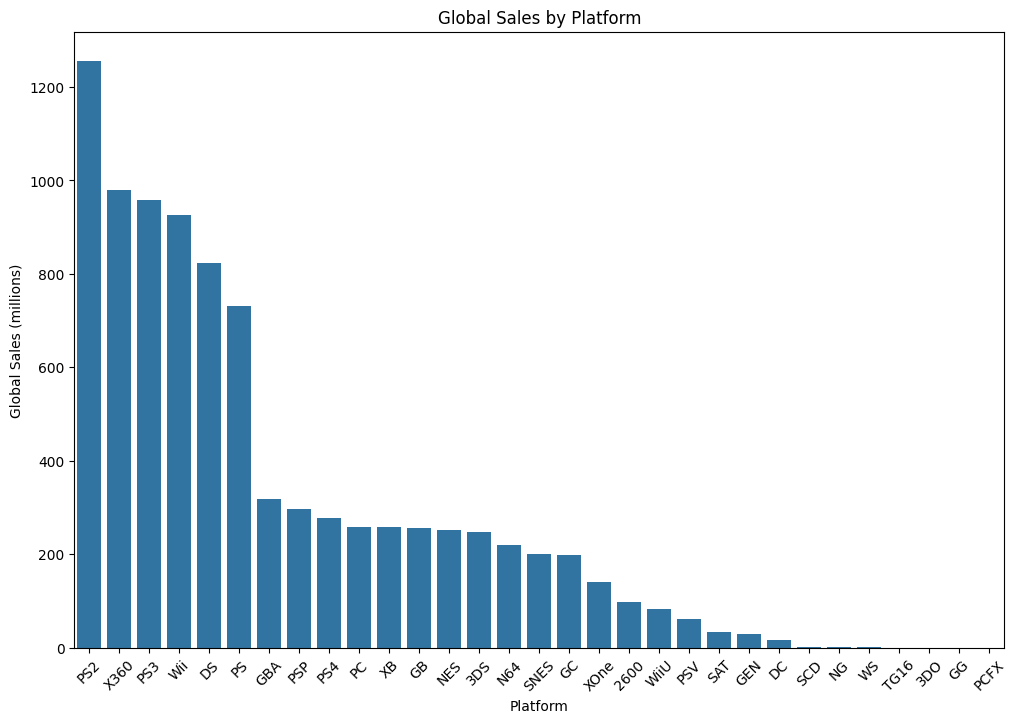

In [8]:
# 
plt.figure(figsize=(12, 8))
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()


C:\Users\amand\AppData\Local\Temp\ipykernel_2760\2280253241.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Name', x='Global_Sales', data=top_games, palette='coolwarm')


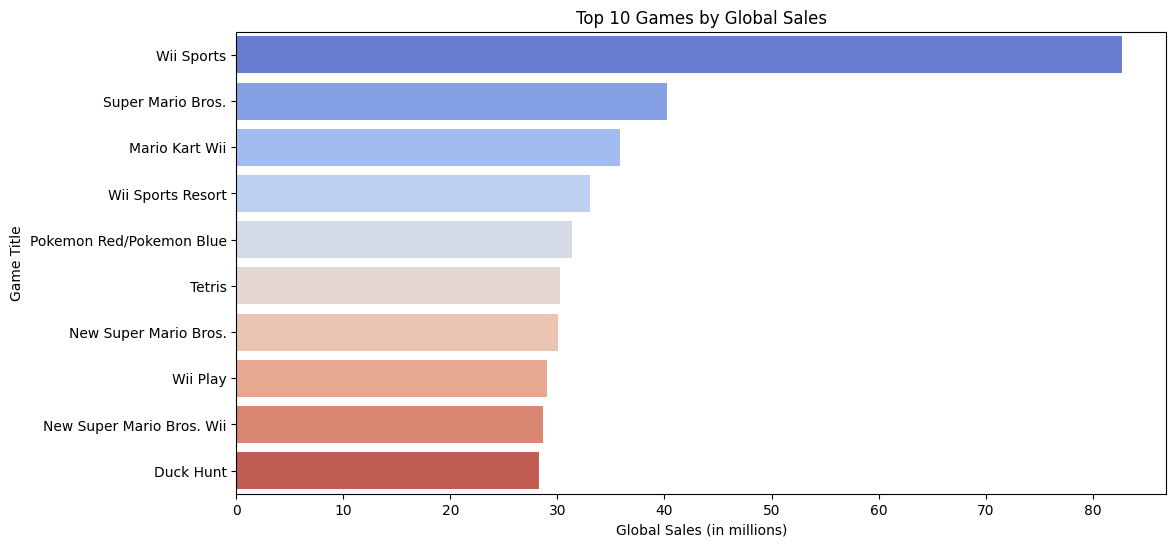

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# sort games by Global Sales and select the top 10
top_games = df.sort_values(by='Global_Sales', ascending=False).head(10)

# plot the top 10 games
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.barplot(y='Name', x='Global_Sales', data=top_games, palette='coolwarm')

# add labels and title
plt.title("Top 10 Games by Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Game Title")

# show the plot
plt.show()


C:\Users\amand\AppData\Local\Temp\ipykernel_2760\3928587712.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Genre', data=sales_by_genre, palette='viridis')


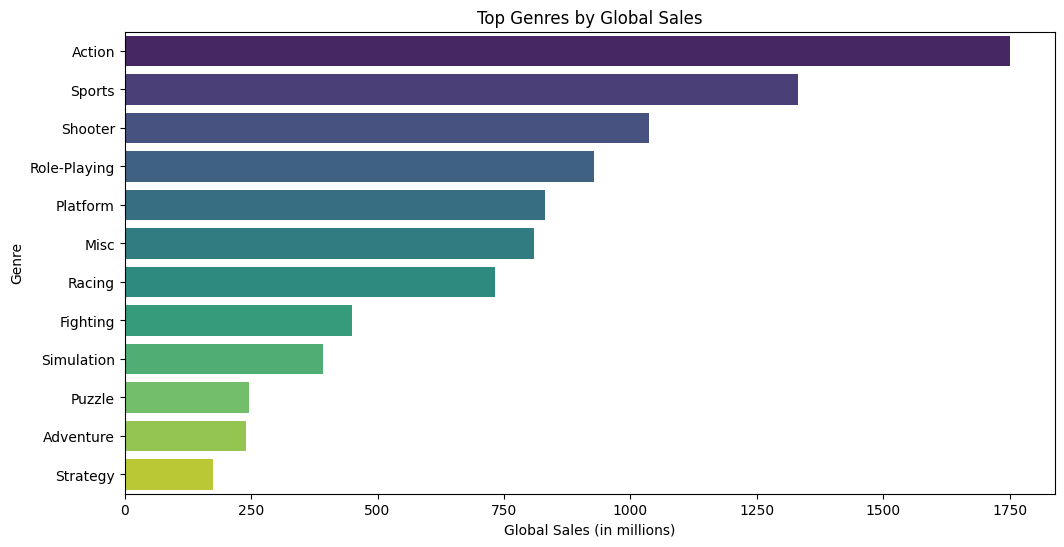

In [10]:
# data genre 
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# sort the genres by sales
sales_by_genre = sales_by_genre.sort_values(by='Global_Sales', ascending=False)

# plot the top genres
plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Genre', data=sales_by_genre, palette='viridis')

# titles and labels
plt.title("Top Genres by Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Genre")

# display
plt.show()


C:\Users\amand\AppData\Local\Temp\ipykernel_2760\69709673.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Region', data=regional_sales, palette='coolwarm')


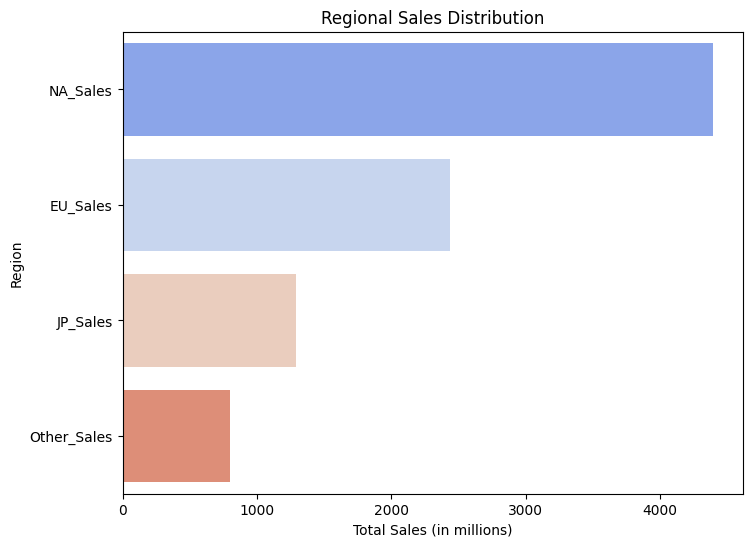

In [11]:
# group sales by region
regional_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
regional_sales.columns = ['Region', 'Sales']

# plot regional sales
plt.figure(figsize=(8, 6))
sns.barplot(x='Sales', y='Region', data=regional_sales, palette='coolwarm')

# title and label regional sales
plt.title("Regional Sales Distribution")
plt.xlabel("Total Sales (in millions)")
plt.ylabel("Region")

# display regional sales
plt.show()
